# 1. 기본설정
## (1) 라이브러리

In [29]:
import time
start_time = time.time()

import os
import pandas as pd
import numpy as np
import tensorflow as tf

from PIL import Image
from PIL import ImageFilter
from matplotlib import pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


## (2) 파라미터 설정

In [21]:
tts_test_size = 0.2
train_test_split_randomstate = 5

classifier_random_state = 32

## (3) 데이터 로드

In [17]:
data_dir = 'C:/Users/User/Google 드라이브/AIFFEL/+Final project/data/'
data_path1 = os.path.join(data_dir, 'prep_data_5x5_4.csv')
data1 = pd.read_csv(data_path1)
data_path2 = os.path.join(data_dir, 'prep_data_5x5_5.csv')
data2 = pd.read_csv(data_path2)
data_path3 = os.path.join(data_dir, 'prep_data_5x5_6.csv')
data3 = pd.read_csv(data_path3)
data = pd.concat([data1, data2, data3])
data.shape

(150, 27)

In [15]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.head(10)

,FSR1,FSR2,FSR3,FSR4,FSR5,FSR9,FSR10,FSR11,FSR12,FSR13,...,FSR26,FSR27,FSR28,FSR29,FSR33,FSR34,FSR35,FSR36,FSR37,Label
0,0,160,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,0,0,27,4
1,0,164,0,0,0,0,0,36,0,0,...,0,0,0,19,0,0,0,0,32,4
2,0,122,0,0,0,0,23,39,0,0,...,0,0,0,59,0,0,0,0,37,4
3,0,170,0,0,0,0,17,41,0,0,...,0,0,0,46,0,0,0,0,28,4
4,0,187,0,0,0,0,18,40,0,0,...,0,0,0,37,0,0,0,0,33,4
5,0,187,0,0,0,0,16,36,0,0,...,0,0,0,38,0,0,0,0,34,4
6,0,201,0,0,0,0,0,32,0,0,...,0,0,0,35,0,0,0,0,27,4
7,0,210,0,0,0,0,0,32,0,0,...,0,0,0,44,0,0,0,0,22,4
8,0,216,0,0,0,0,20,41,0,0,...,0,0,0,45,0,0,0,0,25,4
9,0,221,0,0,0,0,0,31,0,0,...,0,0,0,27,0,0,0,0,23,4


In [16]:
feature = data.iloc[:,:-1]
label = data.iloc[:, -1]
print(feature.shape)
print(label.shape)

(150, 25)
(150,)


In [19]:
temp_array_feature = feature.to_numpy()

list_feature = []
for i in range(len(temp_array_feature)):
    reshaped_array = temp_array_feature[i].reshape(5,5)
    list_feature.append(reshaped_array)
    
array_feature = np.array(list_feature)
array_feature = array_feature.astype('uint8')
array_feature.shape

(150, 5, 5)

In [25]:
array_feature[0]

array([[  0, 160,   0,   0,   0],
       [  0,   0,  32,   0,   0],
       [  0,  30,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  27]], dtype=uint8)

데이터 이미지화


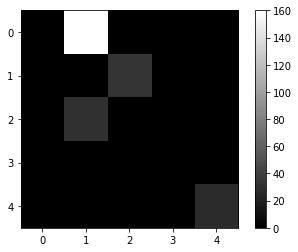

In [30]:
print('데이터 이미지화')
plt.imshow(array_feature[0] , cmap='gray')
plt.colorbar();

In [31]:
# for i, j in enumerate(array_feature):
image = Image.fromarray(array_feature[0])
image_BLUR = image.filter(ImageFilter.BLUR)
image_CONTOUR = image.filter(ImageFilter.CONTOUR)
image_EDGE_ENHANCE = image.filter(ImageFilter.EDGE_ENHANCE)

blur_array_feature = np.array(image_BLUR)
contour_array_feature = np.array(image_CONTOUR)
edge_enhance_array_feature = np.array(image_EDGE_ENHANCE)

stack_array = np.expand_dims(array_feature[0], axis = 2)
blur_stack_array = np.expand_dims(blur_array_feature, axis = 2)
contour_stack_array = np.expand_dims(contour_array_feature, axis = 2)
edge_enhance_stack_array = np.expand_dims(edge_enhance_array_feature, axis = 2)

stack_array = np.concatenate((stack_array, blur_stack_array), axis = 2)
stack_array = np.concatenate((stack_array, contour_stack_array), axis = 2)
stack_array = np.concatenate((stack_array, edge_enhance_stack_array), axis = 2)

stack_array.shape

(5, 5, 4)

# 2. 데이터 전처리

## (1) 데이터 분리

In [22]:
X_train, X_test, y_train, y_test = train_test_split(array_feature, label, 
                                                    test_size = tts_test_size, random_state= train_test_split_randomstate)    ## test_size를 변경하며 시험.
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [1]:
# noise = tf.random.normal([300])
# noise

In [9]:
aux_train = noise

# 3. 모델 학습

In [23]:
inputs = keras.Input(shape = (5, 5, 1))
x = keras.layers.Conv2D(32, 3, activation = 'relu')(inputs) # 입력을 받아 연산.
x = keras.layers.Conv2D(64, 3, activation = 'relu')(x)    # 1차 중간 출력을 받아 연산.
x = keras.layers.Flatten()(x)    # 2차 중간 출력을 받아 연산.
x = keras.layers.Dense(128, activation = 'relu')(x)    # 3차 중간 출력을 받아 연산.
predictions = keras.layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = predictions)

In [24]:
# 모델 학습
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# model.fit([X_train, aux_train], y_train, epochs = 5)
model.fit(X_train, y_train, epochs = 5)

model.evaluate(X_test, y_test, verbose = 2)

Epoch 1/5
4/4 [==============================] - 3s 18ms/step - loss: 3.2078 - accuracy: 0.3833
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 3.2072e-04 - accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 1.1677e-04 - accuracy: 1.0000
1/1 - 0s - loss: 1.2275e-04 - accuracy: 1.0000 - 120ms/epoch - 120ms/step


[0.00012274886830709875, 1.0]

In [10]:
# class MyModel(Model):
#   def __init__(self):
#     super(MyModel, self).__init__()
#     self.inputs = keras.Input(shape = (28, 28, 1))
#     self.conv1 = Conv2D(32, 3, activation='relu')
#     self.conv2 = Conv2D(64, 3, activation='relu')
#     self.flatten = Flatten()
#     self.d1 = Dense(128, activation='relu')
#     self.d2 = Dense(10, activation = 'softmax')

#   def call(self, x):
#     x = self.inputs(x)
#     x = self.conv1(x)
#     x = self.conv2(x)
#     x = self.flatten(x)
#     x = self.d1(x)
#     return self.d2(x)

# model = MyModel()

# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(5, 5)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(10)
# ])

In [12]:
# inputs = keras.Input(shape = (5, 5, 1))
# x = keras.layers.Conv2D(32, 3, activation = 'relu')(inputs) # 입력을 받아 연산.
# x = keras.layers.Conv2D(64, 3, activation = 'relu')(x)    # 1차 중간 출력을 받아 연산.
# x = keras.layers.Flatten()(x)    # 2차 중간 출력을 받아 연산.
# x = keras.layers.Dense(128, activation = 'relu')(x)    # 3차 중간 출력을 받아 연산.

# auxiliary_input = keras.Input(shape=(300,), name='aux_input')
# auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(x)
# x = keras.layers.Concatenate(axis=1)([x, auxiliary_input])
# predictions = keras.layers.Dense(10, activation = 'softmax')(x)    # 4차 중간 출력을 받아 연산. 최종.

# model = keras.Model(inputs = [inputs,auxiliary_input], outputs = predictions)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
# model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])
#               metrics=['accuracy'])

model.summary()

In [ ]:
model.fit(train_dataset, epochs=10)

In [ ]:

# Decision tree
DT_classifier = DecisionTreeClassifier(random_state = classifier_random_state)   ## 모델 지정
DT_classifier.fit(X_train, y_train)

# Random forest
RF_classifier = RandomForestClassifier(random_state = classifier_random_state)   ## 모델 지정
RF_classifier.fit(X_train, y_train)

# Support vector machine
SVM_classifier = svm.SVC(random_state = classifier_random_state)   ## 모델 지정
SVM_classifier.fit(X_train, y_train)

# Stochastic gradient descent
SGD_classifier = SGDClassifier(random_state = classifier_random_state)   ## 모델 지정
SGD_classifier.fit(X_train, y_train)

# Logistic regression
LR_classifier = LogisticRegression(random_state = classifier_random_state, max_iter = 5000)   ## 모델 지정
LR_classifier.fit(X_train, y_train)

# 4. 예측 및 결과 비교

In [ ]:
DT_y_pred = DT_classifier.predict(X_test)
DT_report = classification_report(y_test, DT_y_pred)
print(DT_report)

In [ ]:
RF_y_pred = RF_classifier.predict(X_test)
RF_report = classification_report(y_test, RF_y_pred)
print(RF_report)

In [ ]:
SVM_y_pred = SVM_classifier.predict(X_test)
SVM_report = classification_report(y_test, SVM_y_pred)
print(SVM_report)

In [ ]:
SGD_y_pred = SGD_classifier.predict(X_test)
SGD_report = classification_report(y_test, SGD_y_pred)
print(SGD_report)

In [ ]:
LR_y_pred = LR_classifier.predict(X_test)
LR_report = classification_report(y_test, LR_y_pred)
print(LR_report)